# Perfil de velocidad de Blasius

En clases derivamos la ecuación de Blasius para el perfil de velocidad dentro de la capa límite sobre una placa plana:

\begin{equation}
f'''+\frac{1}{2}ff''=0
\end{equation}

donde sabemos que

\begin{align}
f'(\eta) = \frac{u}{U_\infty}\\
\eta = y\left(\frac{U_\infty}{\nu x}\right)^{1/2}
\end{align}

y las condiciones de borde

\begin{align}
f'(0) = 0\\
f'(\infty) = 1\\
f(0) = 0
\end{align}

En $\eta$, la coordenada $x$ corre paralela a la placa plana e $y$ perpendicular a esta.



## Espesor de capa límite a partir de la ecuación de Blasius

La derivación de Blasius nos dejó con una ecuación diferencial ordinaria de tercer orden, donde la función $f$ depende de solamente una variable ($\eta$). A continuación presentamos un pequeño código que integra la ecuación diferencial numéricamente (utilizando método de Euler de primer orden), para encontrar la solución para $f$, y, por ende, $f'$ y $u(y)$.

El método de Euler integra numéricamente de la siguiente manera

\begin{equation}
F^{n+1} = F^n + h F'^n
\end{equation}

Escribamos una función que haga la iteración de Euler

In [16]:
import numpy

def Euler(F, N, h):
    for i in range(N):
        k1 = h * f_prima(F[i,:])
        F[i+1,:] = F[i,:] + k1
    
    return F

En este caso, $F$ será el vector

\begin{equation}
F = \left(
\begin{array}{c}
f\\
f'\\
f''\\
\end{array}
\right)
\end{equation}

por lo que $F'$ es

\begin{equation}
F' = \left(
\begin{array}{c}
f'\\
f''\\
f'''\\
\end{array}
\right)
\end{equation}

Pero por la ecuación de Blasius, podemos escribir $f'''=-\frac{1}{2}ff''$, y $F'$ queda

\begin{equation}
F' = \left(
\begin{array}{c}
f'\\
f''\\
-\frac{1}{2}ff''\\
\end{array}
\right)
\end{equation}

In [17]:
def f_prima(F):
    return numpy.array([F[1], F[2], -F[2]*F[0]/2])

La ecuación de Blasius es de tercer orden y tenemos tres condiciones de contorno, por lo que deberíamos ser capaces de resolver la ecuación, sin embargo, una de esas condiciones está situada al "final" de nuestra evaluación. Para resolver este problema numéricamente usaremos la técnica de *shooting*: buscar la condición de contorno en $f''(0)$ tal que se cumpla la condición $f'(\infty) = 1$. 

El punto $\eta\to\infty$ está lejos de la placa. Consideremos que $\eta=10$ ya está suficientemente lejos, y $f'(10)\approx1$.

Con prueba y error (no muy eficiente!) llegamos a que la condición de contorno $f''(0)=0.332055$ cumple con $f'(10)\approx1$.

In [18]:
L = 10.
N = 1000000
n = 3

U_inf = 1.

a = 0
b = L
h = (b-a)/N

z = numpy.arange(a,b+h,h)
F = numpy.zeros((N+1, n))

F[0,:] = [0., 0., 0.332055] # Condicion de contorno

F = Euler(F,N,h)

u = F[:,1]*U_inf

print r'eta u'
for i in range(N+1):
    if (i%1000)==0:
        print '{0} {1}'.format(z[i], u[i])

eta u
0.0 0.0
0.01 0.00332054997717
0.02 0.00664109963357
0.03 0.00996164814307
0.04 0.0132821941283
0.05 0.0166027356604
0.06 0.0199232702595
0.07 0.0232437948942
0.08 0.026564305982
0.09 0.0298847993891
0.1 0.0332052704304
0.11 0.0365257138697
0.12 0.0398461239198
0.13 0.0431664942422
0.14 0.0464868179475
0.15 0.0498070875953
0.16 0.0531272951944
0.17 0.0564474322029
0.18 0.0597674895283
0.19 0.0630874575275
0.2 0.0664073260073
0.21 0.069727084224
0.22 0.0730467208843
0.23 0.0763662241451
0.24 0.0796855816134
0.25 0.0830047803475
0.26 0.0863238068564
0.27 0.0896426471004
0.28 0.0929612864916
0.29 0.096279709894
0.3 0.0995979016239
0.31 0.102915845451
0.32 0.106233524597
0.33 0.109550921738
0.34 0.112868019005
0.35 0.116184797983
0.36 0.119501239711
0.37 0.122817324687
0.38 0.126133032863
0.39 0.129448343648
0.4 0.132763235911
0.41 0.136077687978
0.42 0.139391677635
0.43 0.142705182128
0.44 0.146018178163
0.45 0.149330641911
0.46 0.152642549003
0.47 0.155953874536
0.48 0.159264593069


Fíjense que $u=0.99U_\infty$ en $\eta=4.92$. Comúnmente, para la solución de Blasius se usa $\eta=5$. Por lo tanto, considerando que ese punto $y=\delta$ y quedamos con 

\begin{equation}
\frac{\delta}{x}=\frac{5}{\left(\frac{U_\infty x}{\nu}\right)^{1/2}} = \frac{5}{\sqrt{Re_x}} 
\end{equation}

Grafiquemos el perfil de velocidad en $x=0.1$, $x=1$ y $x=2$, y comparémoslo con von Kármán. Como recordatorio, sabemos que von Kármán asume un perfil parabólico de velocidad dentro de la capa límite

\begin{equation}
u = U_\infty\left(\frac{2y}{\delta} - \frac{y^2}{\delta^2}\right)
\end{equation}

y encuentra un espesor de capa límite

\begin{equation}
\frac{\delta}{x} = \frac{5.5}{\sqrt{Re_x}} 
\end{equation}

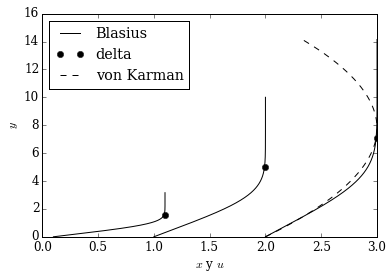

In [19]:
from matplotlib import pyplot
%matplotlib inline
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 12

nu = 1
x1 = 0.1
x2 = 1.
x3 = 2.

# Espesor de Blasius
y1 = z * numpy.sqrt(nu*x1/U_inf)
y2 = z * numpy.sqrt(nu*x2/U_inf)
y3 = z * numpy.sqrt(nu*x3/U_inf)

# Espesor de capa limite
delta1 = 5 * numpy.sqrt(nu*x1/U_inf)
delta2 = 5 * numpy.sqrt(nu*x2/U_inf)
delta3 = 5 * numpy.sqrt(nu*x3/U_inf)

# Espesor y perfil de von Karman
delta_vK = x3*5.5/numpy.sqrt(U_inf*x3/nu)
u_vK = U_inf*(2*y3/delta_vK-y3**2/delta_vK**2)


pyplot.plot(u+x1,y1,c='k',ls='-')
pyplot.plot(u+x2,y2,c='k',ls='-')
pyplot.plot(u+x3,y3,c='k',ls='-', label='Blasius')
pyplot.plot(x1+U_inf, delta1, c='k', marker='o',ls='')
pyplot.plot(x2+U_inf, delta2, c='k', marker='o',ls='')
pyplot.plot(x3+U_inf, delta3, c='k', marker='o',ls='',label='delta')

pyplot.plot(u_vK+x3,y3,c='k',ls='--',label='von Karman')

pyplot.xlabel(r'$x$ y $u$')
pyplot.ylabel(r'$y$')
pyplot.legend(loc='best')
#pyplot.savefig('capa_limite_blasius.pdf')
pyplot.show()

En esta gráfica podemos ver el perfil de Blasius para $x=0.1$, $x=1$ y $x=2$ en línea sólida, puntos negros donde termina la capa límite ($y=\delta$), en línea punteada el perfil parabólico de von Kármán para el caso $x=5$. Podemos ver que dentro de la capa límite, el perfil parabólico se aproxima a la solución de Blasius bastante bien.

## Espesor de desplazamiento

Ya vimos en clases que la definición del espesor de desplazamiento es

\begin{equation}
\delta^* = \int_0^\infty\left(1-\frac{u(y)}{U_\infty}\right)dy
\end{equation}

lo cual podemos reescribir en términos de $f(\eta)$, con $dy = d\eta\left(\frac{\nu x}{U_\infty}\right)^{1/2}$

\begin{align}
\delta^* &= \left(\frac{\nu x}{U_\infty}\right)^{1/2}\int_0^\infty(1-f'(\eta))d\eta\\
& = \left.\left(\frac{\nu x}{U_\infty}\right)^{1/2} (\eta-f(\eta))\right|_\infty
\end{align}

Tenemos los valores de $\eta$ guardados en el vector `z` y los de $f(\eta)$ en `F[:,0]`. Dijimos anteriormente que $\eta=10$ es nuestro "infinito", por lo tanto $\delta^*$ es la diferencia en el último paso calculado

In [20]:
eta_menos_f = z[:] - F[:,0] 
print eta_menos_f

[  0.00000000e+00   1.00000000e-05   1.99999668e-05 ...,   1.72080936e+00
   1.72080936e+00   1.72080936e+00]


Ven como tiende al valor $\eta-f(\eta)=1.721$ hacia el infinito? Viendo la ecuación anterior para $\delta^*$ y dividiendo por $x$, llegamos a

\begin{equation}
\frac{\delta^*}{x} = \frac{1.721}{\sqrt{Re_x}}
\end{equation}

## Esfuerzo cortante

Sabemos que la definición de $\tau_w$ es

\begin{equation}
\tau_w = \left.\mu\frac{du}{dy}\right|_0
\end{equation}

lo cual se puede escribir en términos de $f$ y $\eta$ como

\begin{equation}
\tau_w = \left. U_\infty\mu \frac{df'}{dy}\right|_0 = U_\infty\mu \left(\frac{U_\infty}{\nu x}\right)^{1/2}f''(0) = U_\infty^{3/2}\left(\frac{\mu\rho}{x}\right)^{1/2}f''(0) = 0.332055 U_\infty^{3/2}\left(\frac{\mu\rho}{x}\right)^{1/2} 
\end{equation}

Por otra parte, el coeficiente de arrastre es

\begin{equation}
c_f = \frac{\tau_w}{\frac{1}{2}U_\infty^2\rho} = \frac{2\cdot0.332055}{\sqrt{Re_x}} = \frac{0.664}{\sqrt{Re_x}}
\end{equation}

## Espesor de momentum

En la definición del espesor de momentum dijimos que

\begin{equation}
\tau_w = \rho U_\infty^2 \frac{d\theta}{dx}
\end{equation}

y usando la expresión que encontramos recién para $\tau_w$, quedamos con

\begin{equation}
\theta = \int_0^x 0.332 U_\infty^{3/2}\left(\frac{\mu\rho}{x}\right)^{1/2} \frac{1}{\rho U_\infty^2} dx = \int_0^x 0.332 \left(\frac{\mu}{xU_\infty\rho}\right)^{1/2} dx = 2\cdot0.332 x^{1/2}
\end{equation}

y dividiendo por $x$, queda

\begin{equation}
\frac{\theta}{x} = \frac{0.664}{\sqrt{Re_x}}
\end{equation}